<div style="font-size: 12px;">

### Giải thích từng phần:

1. **`fs = 1000`**:
   - Đặt tần số lấy mẫu là 1000 Hz, có nghĩa là sẽ có 1000 mẫu mỗi giây.

2. **`x = np.arange(0, 2, 1/fs)`**:
   - Tạo một mảng `x` từ 0 đến 2 giây với bước nhảy là \( \frac{1}{fs} \) (1 ms). Mảng này sẽ chứa các giá trị thời gian.

3. **`print(x)`**:
   - In ra mảng `x` để kiểm tra các giá trị thời gian đã được tạo.

4. **`f = 10`**:
   - Đặt tần số của sóng sin là 10 Hz, tức là sóng sẽ có 10 chu kỳ trong một giây.

5. **`y = np.sin(2*np.pi*x*f)`**:
   - Tạo mảng `y` bằng cách tính giá trị của hàm sin cho mỗi giá trị trong mảng `x`. Công thức \( 2\pi f t \) được sử dụng để chuyển đổi thời gian thành góc (radian) cho hàm sin.

6. **`plt.figure(figsize=(10, 6))`**:
   - Tạo một hình mới với kích thước 10 inch chiều rộng và 6 inch chiều cao.

7. **`plt.plot(x, y)`**:
   - Vẽ đồ thị của sóng sin với trục x là thời gian và trục y là biên độ.

8. **`plt.title('Sinusoidal Waveform')`**:
   - Đặt tiêu đề cho đồ thị là "Sinusoidal Waveform".

9. **`plt.xlabel('Time (s)')`**:
   - Đặt nhãn cho trục x là "Time (s)".

10. **`plt.ylabel('Amplitude')`**:
    - Đặt nhãn cho trục y là "Amplitude".

11. **`plt.grid(True)`**:
    - Hiện lưới trên đồ thị để dễ dàng theo dõi các giá trị.

12. **`plt.show()`**:
    - Hiển thị đồ thị đã được vẽ.

### Tóm tắt
Đoạn code này tạo ra một sóng sin với tần số 10 Hz và vẽ nó trên đồ thị, cho phép bạn quan sát hình dạng của sóng theo thời gian.
</div>

Tần số lấy mẫu: 16000 Hz
Kích thước mảng: (48896,)
Một phần dữ liệu: [ 9259488  7347680  7630336  9988096  9497088  2817024   295872 -1894976
  6239680  7004672]


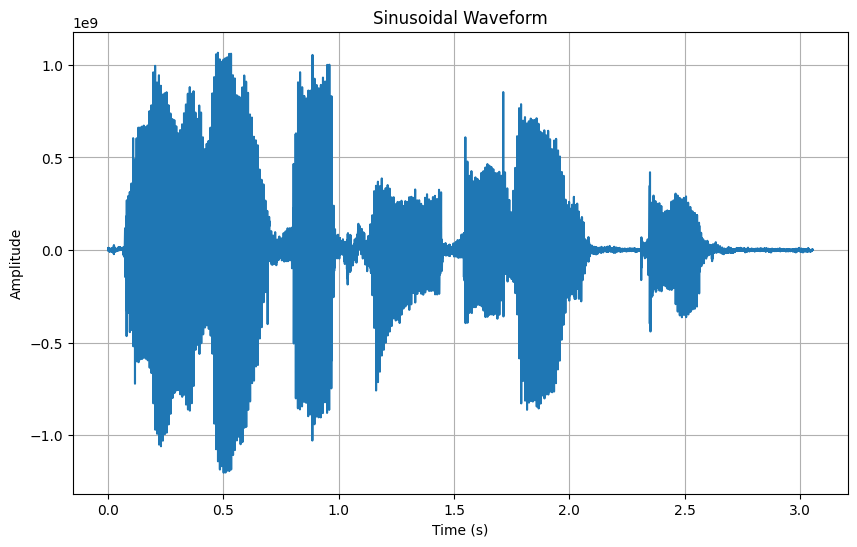

48896


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# fs = 1000 #1000 Hz = 1000 samples/s
# x = np.arange(0, 2, 1/fs) # ts = 1/fs = 1/100 = 0.01s = 10ms
# print(x)
# f = 10 # 3hz, 3 chu kỳ giao động/s
# y = np.sin(2*np.pi*x*f) #+ np.sin(2*np.pi*x*5)# y = A*sin(2*pi*f*t + phi)


from scipy.io import wavfile

# Đọc file âm thanh
fs, y = wavfile.read(r"D:\Workspace\Python\Enjoy\temp_audio.wav")
num_samples = len(y)
x = np.arange(0, num_samples) / fs

print(f"Tần số lấy mẫu: {fs} Hz")
print(f"Kích thước mảng: {y.shape}")
print(f"Một phần dữ liệu: {y[:10]}")



plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title('Sinusoidal Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


SAMPLES = len(x)
print(SAMPLES)

<div style="font-size: 12px;">

### Giải thích mã

```python
real_part = np.zeros(SAMPLES)
imag_part = np.zeros(SAMPLES)
```
- **`real_part` và `imag_part`**: Hai mảng được khởi tạo với kích thước `SAMPLES`, dùng để lưu trữ phần thực và phần ảo của DFT. `np.zeros(SAMPLES)` tạo ra một mảng chứa toàn số 0.

```python
for k in range(fs // 2): #quét tần số
```
- **Vòng lặp `for`**: Vòng lặp này lặp qua các giá trị từ 0 đến \( \frac{fs}{2} \) (tần số Nyquist). `fs` là tần số lấy mẫu của tín hiệu. Mỗi giá trị `k` đại diện cho một tần số cụ thể mà chúng ta sẽ tính toán.

```python
    for n in range(SAMPLES):
```
- **Vòng lặp lồng nhau**: Vòng lặp này lặp qua tất cả các mẫu trong tín hiệu. `n` là chỉ số của mẫu hiện tại.

```python
        real_part[k] += y[n] * np.cos(2 * np.pi * n * k / SAMPLES)
```
- **Tính phần thực**: Công thức này tính toán phần thực của DFT cho tần số `k`. Nó nhân giá trị mẫu `y[n]` với giá trị cosin của tần số tương ứng và cộng dồn vào `real_part[k]`.

```python
        imag_part[k] -= y[n] * np.sin(2 * np.pi * n * k / SAMPLES)
```
- **Tính phần ảo**: Tương tự như trên, nhưng ở đây chúng ta tính toán phần ảo của DFT. Giá trị mẫu `y[n]` được nhân với giá trị sin của tần số tương ứng và trừ đi từ `imag_part[k]`.

```python
frequencies = np.arange(0, fs/2, fs/SAMPLES)
```
- **Tạo mảng tần số**: Dòng này tạo ra một mảng `frequencies` chứa các tần số từ 0 đến \( \frac{fs}{2} \) với bước nhảy là \( \frac{fs}{SAMPLES} \). Điều này cho phép chúng ta biết tần số nào tương ứng với mỗi giá trị trong DFT.

```python
print(frequencies)
```
- **In ra tần số**: Dòng này in ra mảng tần số đã được tạo ra, giúp người dùng thấy được các tần số mà DFT đã tính toán.

```python
magnitudes = np.sqrt(real_part**2 + imag_part**2) / SAMPLES # Cần chia cho N để chuẩn hóa biên độ
```
- **Tính biên độ**: Cuối cùng, biên độ của DFT được tính bằng cách lấy căn bậc hai của tổng bình phương của phần thực và phần ảo. Kết quả được chia cho `SAMPLES` để chuẩn hóa biên độ, đảm bảo rằng giá trị biên độ không bị lệch do số lượng mẫu.

### Tóm tắt
Đoạn mã này thực hiện tính toán DFT cho một tín hiệu, phân tách nó thành các thành phần tần số bằng cách sử dụng các hàm cosin và sin. Kết quả là các phần thực và ảo của DFT, từ đó có thể tính toán được biên độ và tần số tương ứng.
</div>

In [ ]:
# real_part = np.zeros(SAMPLES)
# imag_part = np.zeros(SAMPLES)
# for k in range(fs // 2): #quét tần số
#     for n in range(SAMPLES):
#         real_part[k] += y[n] * np.cos(2 * np.pi * n * k / SAMPLES)
#         imag_part[k] -= y[n] * np.sin(2 * np.pi * n * k / SAMPLES)


# frequencies = np.arange(0, fs/2, fs/SAMPLES)
# print(frequencies)
# magnitudes = np.sqrt(real_part**2 + imag_part**2)



[  0.    0.5   1.    1.5   2.    2.5   3.    3.5   4.    4.5   5.    5.5
   6.    6.5   7.    7.5   8.    8.5   9.    9.5  10.   10.5  11.   11.5
  12.   12.5  13.   13.5  14.   14.5  15.   15.5  16.   16.5  17.   17.5
  18.   18.5  19.   19.5  20.   20.5  21.   21.5  22.   22.5  23.   23.5
  24.   24.5  25.   25.5  26.   26.5  27.   27.5  28.   28.5  29.   29.5
  30.   30.5  31.   31.5  32.   32.5  33.   33.5  34.   34.5  35.   35.5
  36.   36.5  37.   37.5  38.   38.5  39.   39.5  40.   40.5  41.   41.5
  42.   42.5  43.   43.5  44.   44.5  45.   45.5  46.   46.5  47.   47.5
  48.   48.5  49.   49.5  50.   50.5  51.   51.5  52.   52.5  53.   53.5
  54.   54.5  55.   55.5  56.   56.5  57.   57.5  58.   58.5  59.   59.5
  60.   60.5  61.   61.5  62.   62.5  63.   63.5  64.   64.5  65.   65.5
  66.   66.5  67.   67.5  68.   68.5  69.   69.5  70.   70.5  71.   71.5
  72.   72.5  73.   73.5  74.   74.5  75.   75.5  76.   76.5  77.   77.5
  78.   78.5  79.   79.5  80.   80.5  81.   81.5  8

In [15]:
fft_result = np.fft.fft(y)  # Tính FFT
magnitudes = np.abs(fft_result)[:SAMPLES//2]  # Chỉ lấy nửa đầu phổ (do đối xứng)
frequencies = np.fft.fftfreq(SAMPLES, d=1/fs)[:SAMPLES//2]  # Trục tần số


In [ ]:
fft_result

2000

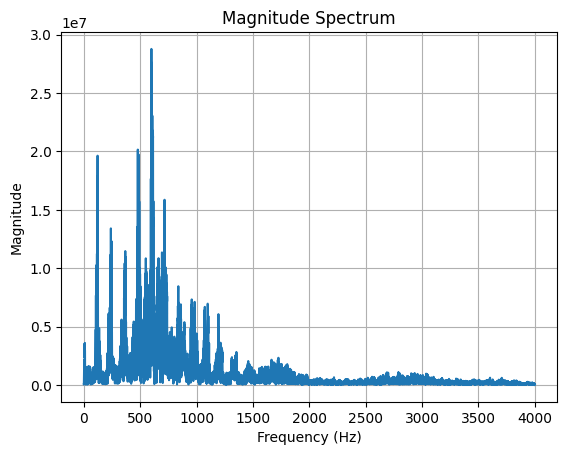

In [19]:
plt.plot(frequencies[:4000*SAMPLES//fs], 1/SAMPLES * 2 * magnitudes[:4000*SAMPLES//fs])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum')
plt.grid(True)
plt.show()


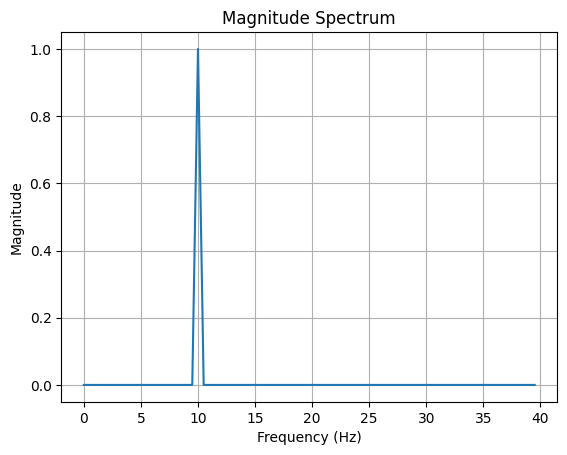

In [6]:
# Plot results
plt.plot(frequencies[:40*SAMPLES//fs], 1/SAMPLES*2*magnitudes[:40*SAMPLES//fs])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum')
plt.grid(True)
plt.show()

# Giải thích chi tiết về Spectrogram
<div style="font-size: 12px;">

Spectrogram là một biểu diễn trực quan của phổ tần số của tín hiệu theo thời gian. Nó cho phép chúng ta phân tích cách các thành phần tần số của tín hiệu thay đổi theo thời gian.

## Nguyên lý hoạt động của Spectrogram

Spectrogram được tạo ra bằng cách:

1. **Chia tín hiệu thành các đoạn nhỏ (frames)**: Tín hiệu được chia thành các đoạn ngắn, thường có độ chồng lấp (overlap).
2. **Áp dụng cửa sổ (windowing)**: Mỗi đoạn được nhân với một hàm cửa sổ (như Hamming, Hanning) để giảm hiệu ứng rò rỉ phổ.
3. **Tính FFT cho từng đoạn**: Biến đổi Fourier nhanh (FFT) được áp dụng cho mỗi đoạn để chuyển từ miền thời gian sang miền tần số.
4. **Tính biên độ phổ**: Biên độ của các thành phần tần số được tính toán.
5. **Biểu diễn dưới dạng hình ảnh 2D**: Kết quả được hiển thị dưới dạng hình ảnh 2D với trục x là thời gian, trục y là tần số, và màu sắc thể hiện cường độ (biên độ).

## Phân tích đoạn mã tạo Spectrogram

```python
from scipy import signal

# Compute the spectrogram data using scipy.signal.spectrogram
f, t, Sxx = signal.spectrogram(y, fs=fs, nperseg=256, noverlap=128, scaling='spectrum')
```

- **`y`**: Tín hiệu đầu vào cần phân tích.
- **`fs`**: Tần số lấy mẫu (sampling frequency) của tín hiệu.
- **`nperseg=256`**: Số điểm trong mỗi đoạn (segment). Đây là kích thước cửa sổ, quyết định độ phân giải tần số.
- **`noverlap=128`**: Số điểm chồng lấp giữa các đoạn liên tiếp. Ở đây là 128 điểm, tức là 50% chồng lấp.
- **`scaling='spectrum'`**: Phương pháp chuẩn hóa phổ. 'spectrum' cho biên độ phổ.

Hàm trả về:
- **`f`**: Mảng các tần số.
- **`t`**: Mảng các thời điểm.
- **`Sxx`**: Ma trận spectrogram, với mỗi phần tử Sxx[i,j] là cường độ tại tần số f[i] và thời điểm t[j].

```python
plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, Sxx, shading='gouraud', cmap='jet')
plt.title('Spectrogram (using scipy.signal)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100 Hz
plt.colorbar(label='Intensity (dB)')
plt.show()
```

- **`plt.pcolormesh()`**: Tạo biểu đồ màu 2D từ dữ liệu spectrogram.
- **`shading='gouraud'`**: Phương pháp làm mịn màu sắc giữa các ô lân cận.
- **`cmap='jet'`**: Bảng màu sử dụng, 'jet' có dải màu từ xanh dương (cường độ thấp) đến đỏ (cường độ cao).
- **`plt.ylim(0, 100)`**: Giới hạn trục y (tần số) từ 0 đến 100 Hz để tập trung vào dải tần số quan tâm.

## Kết luận

Spectrogram là công cụ mạnh mẽ cho phép chúng ta "nhìn thấy" âm thanh và các tín hiệu khác theo cả thời gian và tần số. Trong xử lý tín hiệu, nó giúp chúng ta hiểu rõ hơn về đặc tính của tín hiệu và các thay đổi theo thời gian, từ đó có thể áp dụng các phương pháp xử lý phù hợp.
</div>


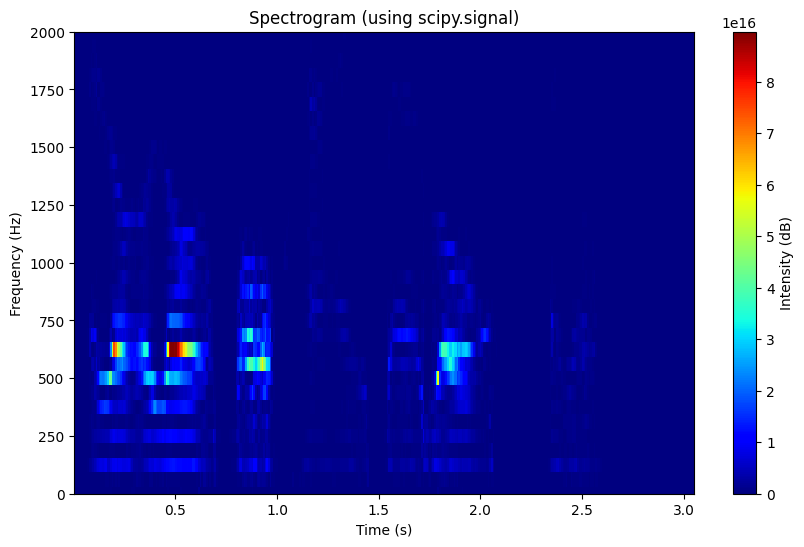

In [22]:
from scipy import signal

# Compute the spectrogram data using scipy.signal.spectrogram
f, t, Sxx = signal.spectrogram(y, fs=fs, nperseg=256, noverlap=128, scaling='spectrum')
plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, Sxx, cmap='jet')
plt.title('Spectrogram (using scipy.signal)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.ylim(0, 2000)  # Set y-axis limit from 0 to 100 Hz
plt.colorbar(label='Intensity (dB)')
plt.show()

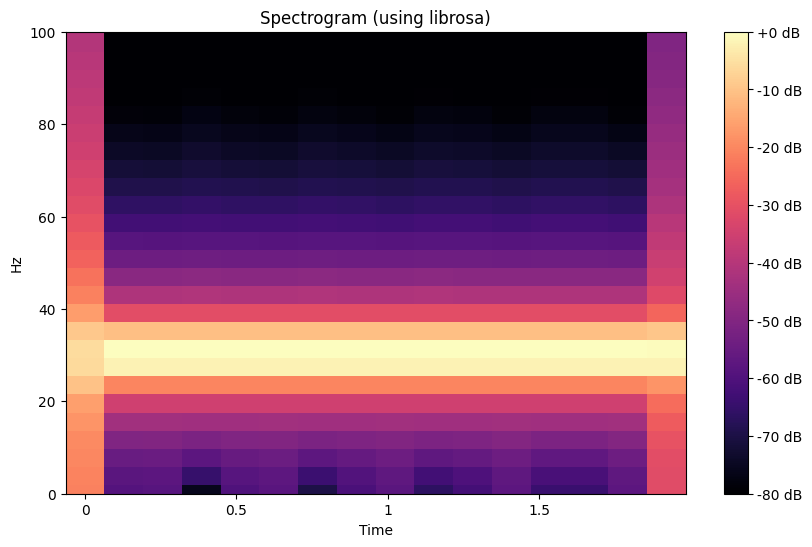

In [23]:
import librosa
import librosa.display

# Create spectrogram using librosa
D = librosa.stft(y, n_fft=256, hop_length=128)
DB = librosa.power_to_db(np.abs(D)**2, ref=np.max)

plt.figure(figsize=(10, 6))
librosa.display.specshow(DB, sr=fs, hop_length=128, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100 Hz
plt.title('Spectrogram (using librosa)')
plt.show()


[0.000e+00 1.000e-03 2.000e-03 ... 1.997e+00 1.998e+00 1.999e+00]


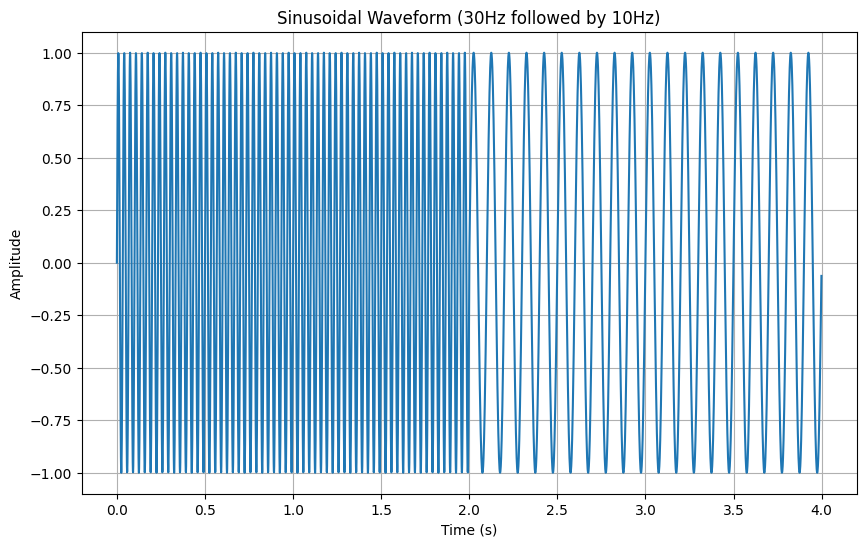

4000


In [35]:
import numpy as np
import matplotlib.pyplot as plt

# First 2 seconds with 30 Hz signal
fs = 1000 #1000 Hz = 1000 samples/s
x = np.arange(0, 2, 1/fs) # ts = 1/fs = 1/100 = 0.01s = 10ms
print(x)
f = 30 # 3hz, 3 chu kỳ giao động/s
y1 = np.sin(2*np.pi*x*f) #+ np.sin(2*np.pi*x*5)# y = A*sin(2*pi*f*t + phi)

# Additional 2 seconds with 10 Hz signal
x2 = np.arange(2, 4, 1/fs)
f2 = 10 # 10Hz signal
y2 = np.sin(2*np.pi*x2*f2)

# Combine the signals
x_combined = np.concatenate((x, x2))
y = np.concatenate((y1, y2))

# Plot the combined signal
plt.figure(figsize=(10, 6))
plt.plot(x_combined, y)
plt.title('Sinusoidal Waveform (30Hz followed by 10Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

SAMPLES = len(y)
print(SAMPLES)

[0.0000e+00 2.5000e-01 5.0000e-01 ... 4.9925e+02 4.9950e+02 4.9975e+02]


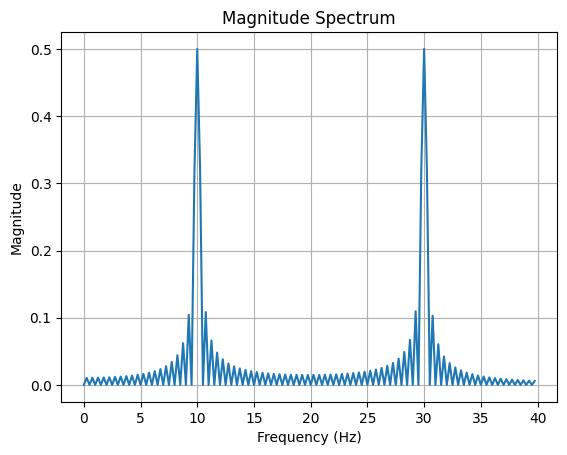

In [36]:

real_part = np.zeros(SAMPLES)
imag_part = np.zeros(SAMPLES)
for k in range(fs // 2): #quét tần số
    for n in range(SAMPLES):
        real_part[k] += y[n] * np.cos(2 * np.pi * n * k / SAMPLES)
        imag_part[k] -= y[n] * np.sin(2 * np.pi * n * k / SAMPLES)


frequencies = np.arange(0, fs/2, fs/SAMPLES)
print(frequencies)
magnitudes = np.sqrt(real_part**2 + imag_part**2)
# Plot results
plt.plot(frequencies[:40*SAMPLES//fs], 1/SAMPLES*2*magnitudes[:40*SAMPLES//fs])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum')
plt.grid(True)
plt.show()

In [25]:
real_part = np.zeros(SAMPLES)
imag_part = np.zeros(SAMPLES)
for k in range(fs // 2): #quét tần số
    for n in range(SAMPLES):
        real_part[k] += y[n] * np.cos(2 * np.pi * n * k / SAMPLES)
        imag_part[k] -= y[n] * np.sin(2 * np.pi * n * k / SAMPLES)


frequencies = np.arange(0, fs/2, fs/SAMPLES)
print(frequencies)
magnitudes = np.sqrt(real_part**2 + imag_part**2)

[0.0000e+00 2.5000e-01 5.0000e-01 ... 4.9925e+02 4.9950e+02 4.9975e+02]


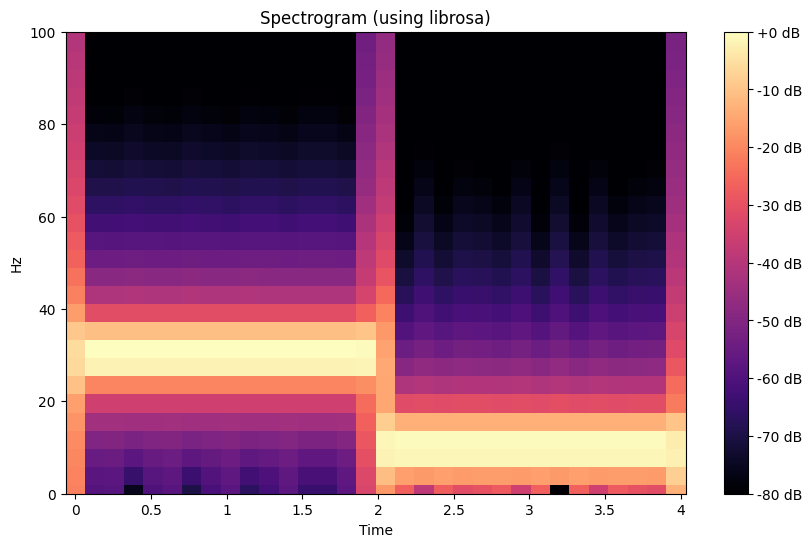

In [26]:
import librosa
import librosa.display

# Create spectrogram using librosa
D = librosa.stft(y, n_fft=256, hop_length=128)
DB = librosa.power_to_db(np.abs(D)**2, ref=np.max)

plt.figure(figsize=(10, 6))
librosa.display.specshow(DB, sr=fs, hop_length=128, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100 Hz
plt.title('Spectrogram (using librosa)')
plt.show()

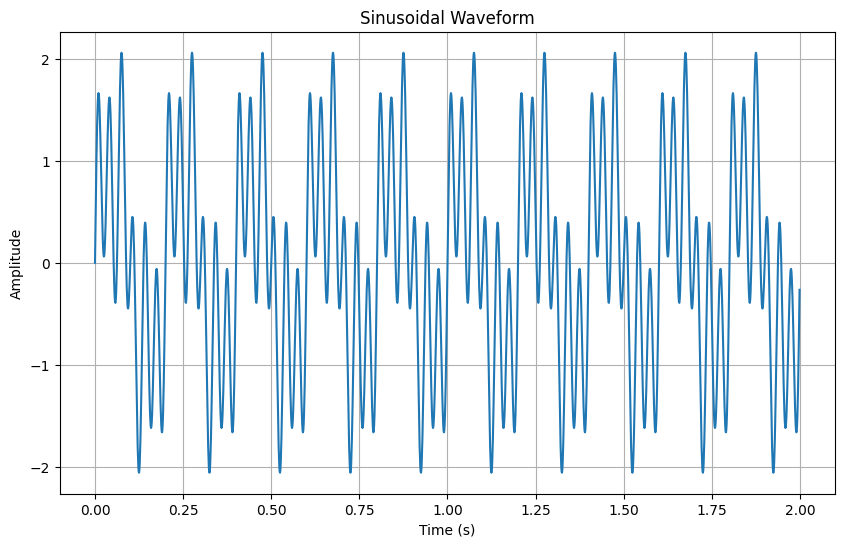

In [27]:
import numpy as np
import matplotlib.pyplot as plt

fs = 1000 #250 Hz = 250 samples/s
t = np.arange(0, 2, 1/fs) # ts = 1/fs = 1/100 = 0.01s = 10ms
f = 30 # 3hz, 3 chu kỳ giao động/s
z = np.sin(2*np.pi*t*f) + np.sin(2*np.pi*t*5)+ 0.5*np.sin(2*np.pi*t*15)# y = A*sin(2*pi*f*t + phi)
SAMPLES = len(z)
plt.figure(figsize=(10, 6))
plt.plot(t, z)
plt.title('Sinusoidal Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [28]:

real_part = np.zeros(SAMPLES)
imag_part = np.zeros(SAMPLES)
for k in range(fs // 2): #quét tần số
    for n in range(SAMPLES):
        real_part[k] += z[n] * np.cos(2 * np.pi * n * k / SAMPLES)
        imag_part[k] -= z[n] * np.sin(2 * np.pi * n * k / SAMPLES)


frequencies = np.arange(0, fs/2, fs/SAMPLES)
print(frequencies)
magnitudes = np.sqrt(real_part**2 + imag_part**2)

[  0.    0.5   1.    1.5   2.    2.5   3.    3.5   4.    4.5   5.    5.5
   6.    6.5   7.    7.5   8.    8.5   9.    9.5  10.   10.5  11.   11.5
  12.   12.5  13.   13.5  14.   14.5  15.   15.5  16.   16.5  17.   17.5
  18.   18.5  19.   19.5  20.   20.5  21.   21.5  22.   22.5  23.   23.5
  24.   24.5  25.   25.5  26.   26.5  27.   27.5  28.   28.5  29.   29.5
  30.   30.5  31.   31.5  32.   32.5  33.   33.5  34.   34.5  35.   35.5
  36.   36.5  37.   37.5  38.   38.5  39.   39.5  40.   40.5  41.   41.5
  42.   42.5  43.   43.5  44.   44.5  45.   45.5  46.   46.5  47.   47.5
  48.   48.5  49.   49.5  50.   50.5  51.   51.5  52.   52.5  53.   53.5
  54.   54.5  55.   55.5  56.   56.5  57.   57.5  58.   58.5  59.   59.5
  60.   60.5  61.   61.5  62.   62.5  63.   63.5  64.   64.5  65.   65.5
  66.   66.5  67.   67.5  68.   68.5  69.   69.5  70.   70.5  71.   71.5
  72.   72.5  73.   73.5  74.   74.5  75.   75.5  76.   76.5  77.   77.5
  78.   78.5  79.   79.5  80.   80.5  81.   81.5  8

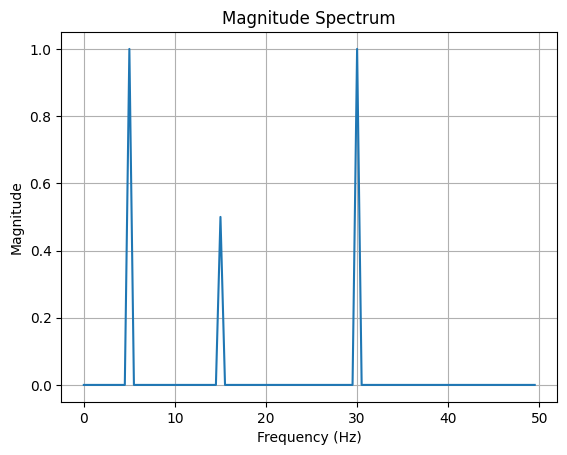

In [6]:
# Plot results
plt.plot(frequencies[:50*SAMPLES//fs], 1/SAMPLES*2*magnitudes[:50*SAMPLES//fs])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum')
plt.grid(True)
plt.show()

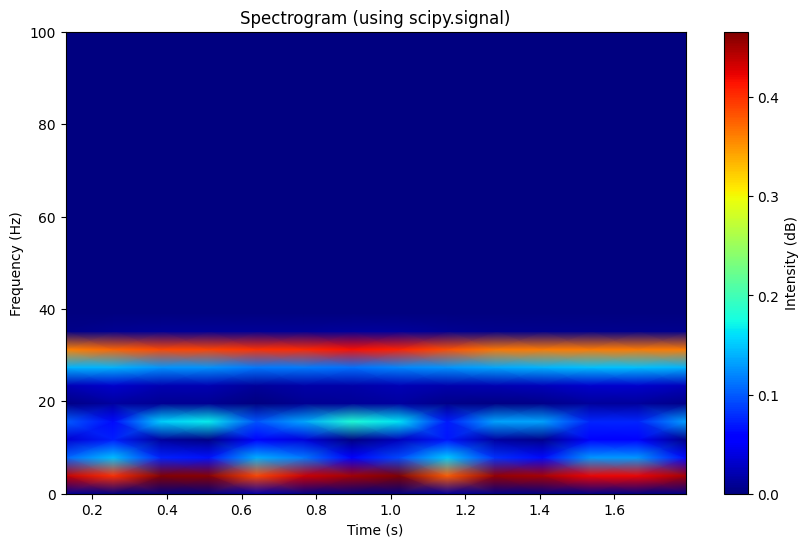

In [29]:
# Create spectrogram using scipy.signal
from scipy import signal

# Compute the spectrogram data using scipy.signal.spectrogram
f, t, Sxx = signal.spectrogram(z, fs=fs, nperseg=256, noverlap=128, scaling='spectrum')

# Now plot the spectrogram data
plt.figure(figsize=(10, 6))
# plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud', cmap='jet') 
plt.pcolormesh(t, f, Sxx, shading='gouraud', cmap='jet') # Using viridis colormap
plt.title('Spectrogram (using scipy.signal)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100 Hz
plt.colorbar(label='Intensity (dB)')
plt.show()